# Exemplar Answer Generation Project - Data Analysis Section

This notebook analyzes the training data (`cura-llm-training-data.json`) for generating exemplar answers using OpenAI's API. The analysis aims to understand the characteristics and patterns in the dataset to inform the development of an effective exemplar answer generation system.

## Analysis Objectives
- Examine the distribution of question and answer lengths
- Analyze task content characteristics
- Understand the rubric scoring patterns
- Identify potential patterns and correlations in the data

## Dataset Overview
The training dataset contains:
- Task content
- Assessment questions
- Rubric information including scoring criteria
- Exemplar answers
- Associated metadata like question IDs and task IDs

This analysis will provide insights into data patterns and help establish baseline metrics for evaluating generated answers.

## Environment Setup and Dependency Import

In this section, I set up the necessary environment. Aimed to assist the later dependencies import in the project. Several libraries and modules will be imported throughout the code for various tasks such as data manipulation and analysis.

In [1]:
! pip install pandas numpy matplotlib seaborn

  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp39-cp39-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp39-cp39-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
Using cached numpy-2.0.2-cp39-cp39

# Section 1: Training Data Retrieval

In [2]:
# Dependency Imports for section 1

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from statistics import mean

# Set style for visualizations
sns.set_palette('husl')

## 1.1 DataSet Processing

### 1.1.1 Data Loading

In [3]:
# Load the training data
with open('data/cura-llm-training-data.json', 'r') as file:
    training_data = json.load(file)
    
    print(f"Loaded {len(training_data)} training samples")

Loaded 117 training samples


### 1.1.2 Exploratory Analysis

Analyzing key characteristics of our dataset

In [4]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(training_data)

# Display first few rows of the DataFrame
df.head()


,question_id,task_id,question,rubric,answer,task_title,task_content
0,8b1d6474-a38a-4456-8ac2-74ff054b9d67,41f89fd8-0d25-4aa7-848c-6840f01023da,Which fin design worked best? Why?,"{""items"": [""I can explain my response"", ""I can...","""Fin designs that have three or four triangula...",Designing your rocket,Designing your rocket Building phase Th...
1,8add417a-4108-43e6-b033-4fa72ac4f709,35d95305-bc3a-461a-ba96-83063257f32d,Which planet had the fastest and slowest orbit...,"{""items"": [""I can explain why these planets ha...","""Mercury has the fastest orbit of 88 days. Thi...",The orbits of other planets,The orbits of other planets The orbits of o...
2,89edd167-18ed-40ba-93f1-93999a800097,c4c7058a-5f65-45a2-b097-30733070e4bd,"Based on your results (ie. shape, volume, and ...","{""items"": [""I can identify the three propertie...","""Exemplar AnswerSolids - shape did not change,...",What are objects made of?,What are objects made of? What affects whet...
3,8632c092-ea9f-4ba2-bdfa-d2f335c95247,cb21ad07-eed4-49a4-9d63-5e266a0b19b0,Determine the ratio of the load force to effor...,"{""items"": [""I can explain how we know this"", ""...","""The ratio of the load force to the effort for...",Forces in action - seesaws,Forces in action - seesaws Turning forces ...
4,8422d140-5d31-4933-ae45-52f380e1213a,fe99ba29-d69a-4231-8a66-badedae898b2,Describe the shape of the Earth’s orbit around...,"{""items"": [""I can explain the shape of the Ear...","""The Earth’s orbit around the Sun is an ellipt...",Earth's orbit,Earth's orbit What is an orbit? An orbi...


In [5]:
# Calculate basic statistics
stats = {
    'question_lengths': [len(q) for q in df['question']],
    'answer_lengths': [len(str(a)) for a in df['answer']],
    'task_content_lengths': [len(str(t)) for t in df['task_content']],'rubric_total_scores': [int(json.loads(r)['total_score']) for r in df['rubric']]
}

# Create summary statistics
summary = pd.DataFrame({
    'Metric': ['Question Length', 'Answer Length', 'Task Content Length'],
    
    'Mean': [mean(stats['question_lengths']), mean(stats['answer_lengths']), mean(stats['task_content_lengths'])],
    
    'Min': [min(stats['question_lengths']), min(stats['answer_lengths']), min(stats['task_content_lengths'])],
    
    'Max': [max(stats['question_lengths']), max(stats['answer_lengths']), max(stats['task_content_lengths'])]
})
    
    
summary

,Metric,Mean,Min,Max
0,Question Length,131.427350,27,1245
1,Answer Length,273.564103,8,1184
2,Task Content Length,4737.264957,1094,41562


### 1.1.3 Visualization of Data Characteristics

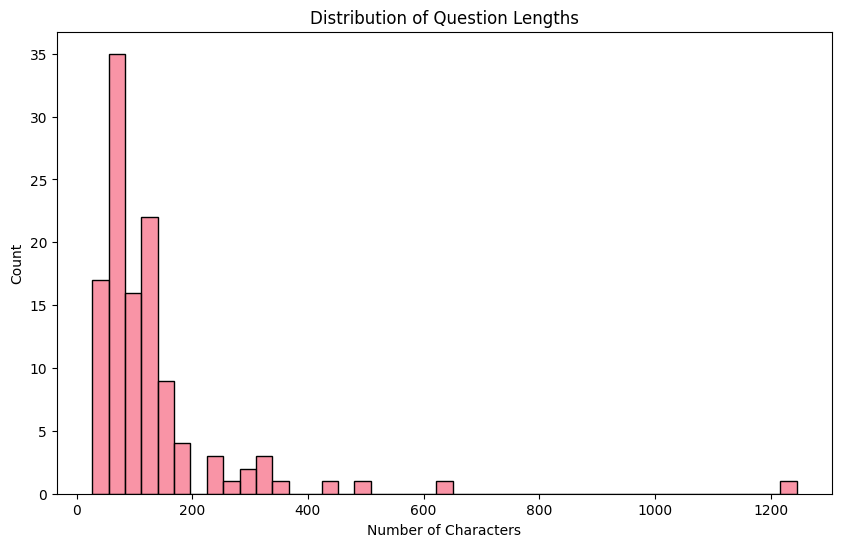

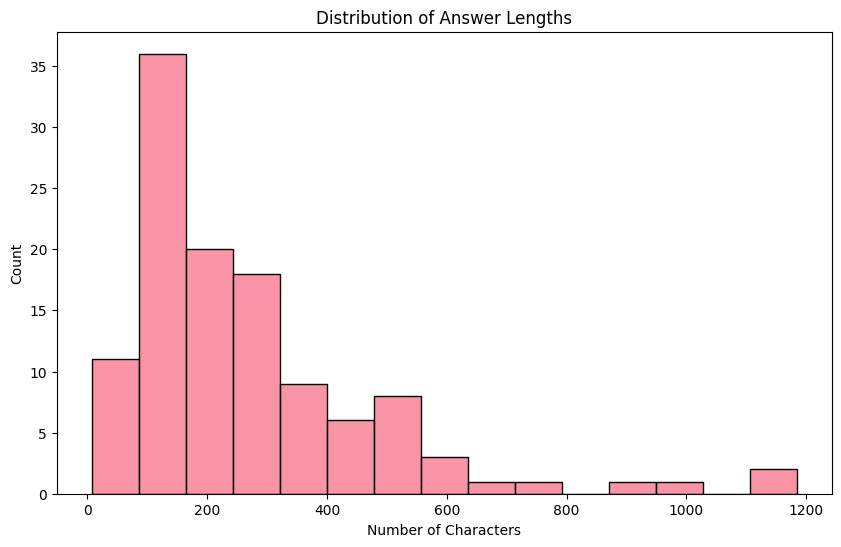

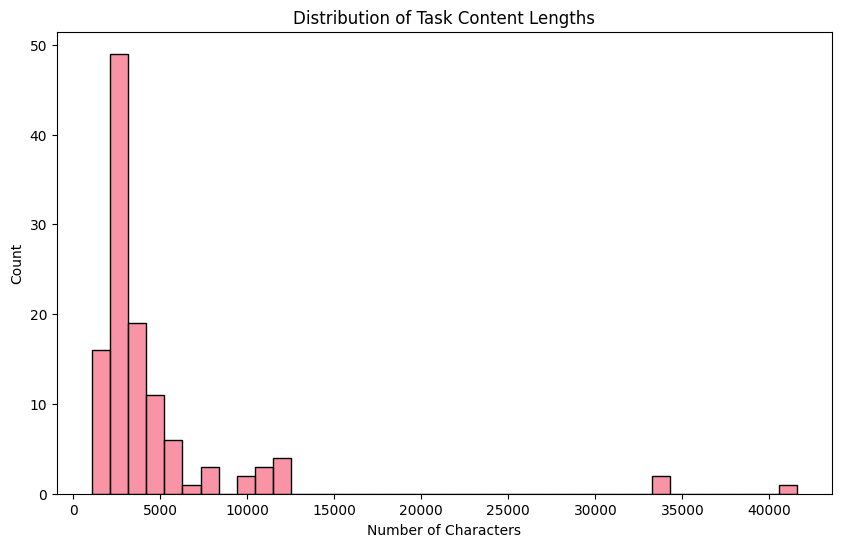

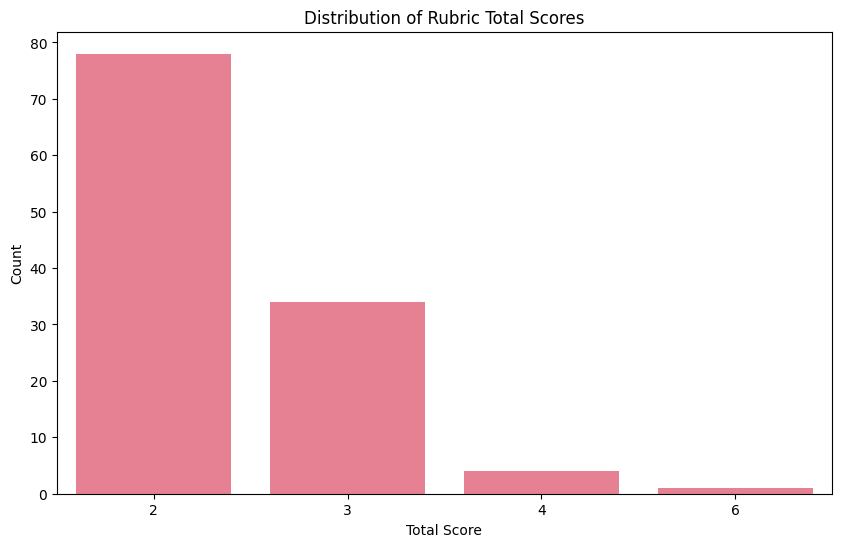

In [6]:
# Set the style for all plots
figsize = (10, 6)

# Question lengths plot
plt.figure(figsize=figsize)
sns.histplot(stats['question_lengths'])
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

# Answer lengths plot
plt.figure(figsize=figsize)
sns.histplot(stats['answer_lengths'])
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

# Task content lengths plot
plt.figure(figsize=figsize)
sns.histplot(stats['task_content_lengths'])
plt.title('Distribution of Task Content Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

# Rubric scores plot
plt.figure(figsize=figsize)
sns.countplot(x=stats['rubric_total_scores'])
plt.title('Distribution of Rubric Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Count')
plt.show()

### 1.1.4 The Analysis of Data Characteristics

- Based on our dataset, the **question length** distribution shows a concentration primarily between **0-200 characters**, with some **outliers** extending beyond **1000 characters**. This **left-skewed distribution pattern** may indicates that the platform prioritizes concise questions, with only a small number of questions requiring more extensive descriptions.

- The exemplar answers follow a similar **left-skewed distribution**, with the majority of responses **concentrated between 100-400 characters** and a **gradual tail extending beyond 800 characters**. This pattern demonstrates that most answers are designed to be **concise**, though some **complex** questions might require more **detailed explanations**.

- Task content analysis also exhibits **left-skewed distribution**, with most content falling between **0 to 13,000 characters** and a long tail reaching up to **40,000 characters**. This distribution might reflect the educational materials' structure, where most tasks are presented **concisely**, while some specialized topics require more **extensive context and instructions**.

- The rubric scoring system shows a clear concentration at **2-point and 3-point scales**, with minimal usage of **4-point or 6-point scales**. This focused distribution may suggest a standardized assessment approach, emphasising clear differentiation between achievement levels and maintaining **simplicity** in the grading process.